In [2]:
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
from scipy import ndimage, misc
import numpy as np
from math import sqrt

In [27]:
c = np.ones((10, 10))
c *= -1

for i in range(10):
    d = 10 - round(sqrt(100 - i*i))
    c[i, d] = 7

c[i, d:9] = 7
        
c

array([[ 7., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 7., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 7., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 7., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1.,  7., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1.,  7., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1.,  7., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1.,  7., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1.,  7., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.,  7.,  7.,  7., -1.]])

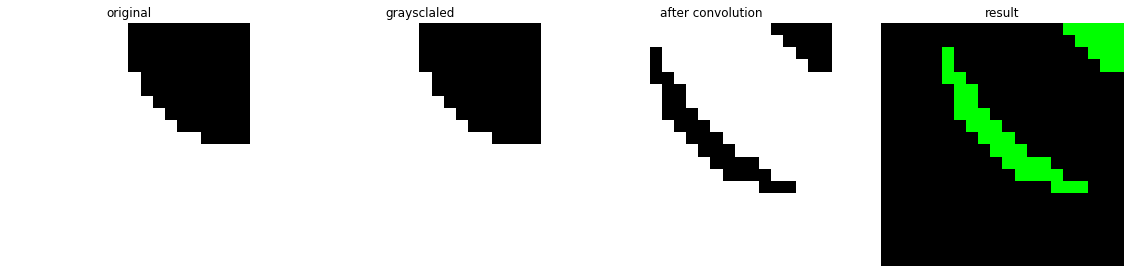

In [34]:
# Load image:
input_image = Image.open("data/lab_1_1_pic_2.png")
input_pixels = input_image.load()
width, height = input_image.width, input_image.height

# Make grayscaled
gray = input_image.copy()
gray_drawer = ImageDraw.Draw(gray)

for x in range(width):
    for y in range(height):
        av = int((input_pixels[x, y][0] + input_pixels[x, y][1] + input_pixels[x, y][2]) / 3)
        gray_drawer.point((x, y), (av, av, av))
gray_pixels = gray.load()
gray_arr = np.array([[gray_pixels[x, y][0] for x in range(width)] for y in range(height)])


# Convolution
result = ndimage.convolve(gray_arr, c, mode='nearest', cval=0)
result = result.transpose()

# Create output image
result2 = np.zeros(result.shape)
for x in range(width):
    for y in range(height):
        if result[x,y] < 0:
            result2[x,y] = 1
            
output_image = Image.new("RGBA", input_image.size)
output_image.paste( (0,255,0), (0,0,output_image.size[0],output_image.size[1]))
o_drawer = ImageDraw.Draw(output_image)
for x in range(width):
    for y in range(height):
        if result2[x,y] == 1:
            o_drawer.point((x,y), (0, 0, 0))
        
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,6))

ax1.set_title('original')
ax1.axis('off')
ax2.set_title('graysclaled')
ax2.axis('off')
ax3.set_title('after convolution')
ax3.axis('off')
ax4.set_title('result')
ax4.axis('off')

ax1.imshow(input_image)
ax2.imshow(gray)
ax3.imshow(result2.T, cmap="gray")
ax4.imshow(output_image)
    

output_image.save("edge.png")

In [64]:
result[:5,:100]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,  -255,   510,  3315,  8160, 17085, 24225,
        24225, 24225, 24225, 24225, 24225, 24225, 24225, 24225, 24225,
        24225, 24225, 24225, 24225, 24225, 24225, 24225, 24225, 24225,
        24225],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     